In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import math
import random
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import pandas as pd
from sklearn.neural_network import MLPClassifier

# Task 1
### Purpose: Describe how a perceptron can be used to classify two objects 


## Answer

Perceptron is a simple linear classification model and can be used to classify 2 objects based on their features. It uses supervised learning as it requires that the output is known. For the current problem, the input space from the given dataset consists of two features. They are circumference and weight of the object. For convenience let's consider the objects as tennis and cricket balls. Our end goal is to correctly classify a new object(data point from test data) as a cricket ball or a tennis ball, based on it's features. Therefore the output space is {cricket_ball, tennis_ball}. To train the model a sample from the dataset called training data is used. Later, inorder to test the model reminder of dataset called test data is used.

Let us assume linear seperabilty in the input space. This implies that when a scatter plot is created using circumference and weight, the data points should be such that a line can be drawn to divide the plane into two parts. One side(right side) of the plane should only contain cricket balls while the other side(left side) contains tennis balls. This line or the ideal linear function is called target function. Through this unknown target function objects can be classified based on which side of the line the data point lies. For example, if a point lies on the right side, it is classified as cricket ball.  Assuming this case, now all that is left is find this target function or find a linear function which approximates this target function.

Perceptron uses a linear formula, h(x) = sign($\sum_{i = 0}^{d}w_{i}x_{i}$) to create hypothesis set,where w is a weight vector and x is training data. To find an intial hypothesis, w vector is picked at random. Now perceptron checks for misclassified data points using the hypothesis(a line) on the sample data. If a misclassified point is found, weight vector- w is updated using the following formula: $w_{new} = w_{old} + y_{n}x_{n}$. This new weight is created such that new hypothesis attempts to correct the misclassified data point. This process is continued until there are no misclassified points left. Since the data is assumed to be linearly seperable, eventually the process gets to a last hypothesis where all the points are classified correctly and the iterations stop.

As a final step, perceptron learning algorithm does the work of picking the final hypothesis from the hypothesis set by minimizing in-sample error(Ein). Ein depends on the error measure which in this case is binary error as it is a binary linear classification problem. Once the final hypothesis is picked, we check performance of the model by finding out-of-sample error(Eout). Small Eout shows greater approximation to the target function.  Furthermore, if Eout is closer to Ein, it shows greater generalization on the new data.

# Task 2
Learning curves allow us to look at the impact that the size of the training data set N has on the ability to keep the difference between $E_{in}$ and $E_{out}$ small.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    #plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_errors = 1- train_scores
    test_errors = 1-test_scores
    
    train_errors_mean = np.mean(train_errors, axis=1)
    train_errors_std = np.std(train_errors, axis=1)
    test_errors_mean = np.mean(test_errors, axis=1)
    test_errors_std = np.std(test_errors, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_errors_mean - train_errors_std,
                     train_errors_mean + train_errors_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_errors_mean - test_errors_std,
                     test_errors_mean + test_errors_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_errors_mean, 'o-', color="r",
             label="Training error")
    plt.plot(train_sizes, test_errors_mean, 'o-', color="g",
             label="Test error")

    
    plt.legend(loc="best")
    return plt

In [ ]:
data = np.loadtxt("Et1_Task2.csv", delimiter=",")
X = data[:,0:2]
y=data[:,2]

## Logistic regression learning curve

In [ ]:
cv = ShuffleSplit(n_splits=25, test_size=0.2)

In [ ]:
estimator = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4, train_sizes = np.linspace(0.01, .5, 5))

## Neural net learning curves

In [ ]:
estimator = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(200, 4), random_state=1)
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4, train_sizes = np.linspace(0.01, .5, 5))

# Reflection
Describe the results of the two learning curves and explain the differences in terms of what you currently understand about the relationship between $E_{in}$ and $E_{out}$ and the number of training samples, N. Provide clear explanations:

- Why the training error is (generally) lower than the test error
- Why the training error increases as the number of training samples is increased
- Which of the two models is the more complex model

### Answer


Q1. Why the training error is (generally) lower than the test error\
A. Since the model is created on training data, it tries to encampass all the sample data points as much as possible. Hence this is the best case scenario for the model. Comparitively, the model will perform poorly on new unseen data than trained data. For this reason Ein is always lower than Eout. As N increases, both Ein and Eout tend to converge towards each other because of the decrease in generalization error on bigger samples.

Q2. Why the training error increases as the number of training samples is increased\
A. As sample size increases, variablity in the data points increases. The model will have to accomodate for this added variability and hence increases the in-sample error. Intuitively we can also see that more data points leads to higher generalization and this brings certain amount of error into the model as a compromise. This increase in in-sample error is not so bad, as it eventually contributes to a lower Eout than before due to good generalization.

Q3. Which of the two models is the more complex model\
A. Neural networks is the more complex model as the Ein is very very small showing greater approximation to target function than logistic regression. Also, the generalization error width that is |Ein - Eout| is higher showing that it has poor generalization on new data. Hence it is overfitted model. For this reason logistic regression is a better model for this data.




# Task 3

## Provided functions

Below functions implement linear regression in a closed form (one-step solution using the pseudo-inverse).

In [7]:
def linreg_weights(X,y):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],1)),axis=1)
    # Calculation of weights using pseudo-inverse.
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [8]:
def linreg_predict(w,X):
    ''' Returns a prediction y for data point X for a linear regression described by weights w '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],1)),axis=1)
    
    # Calculation of outputs given weights and data (X). 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

# Task 3a

### Answer

In [4]:
def calc_error(X,y):
    #  mean squared error function for linear regression
    weights = linreg_weights(X,y)
    predicted_y = linreg_predict(weights,X)
    squarederror = np.square(predicted_y - y)
    error = np.sum(squarederror)/len(X)
    return error


In [5]:
# Loading data from csv
data = np.loadtxt("Et1_Task3a.csv", delimiter=",")
X = data[:,0]
y= data[:,1]

### Mathematical equation for this regression model

y_fun = 0.37569601 + 0.5105054*x_fun

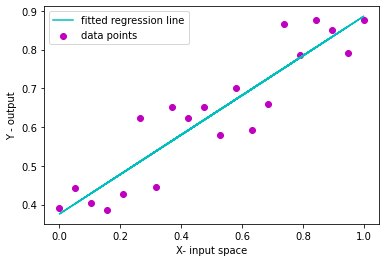

In [9]:
# Regression line plot
weights = linreg_weights(X,y)
predicted_y = linreg_predict(weights,X)

plt.plot(X,predicted_y, color = 'c')
plt.scatter(X, y, color= 'm')
plt.xlabel("X- input space")
plt.ylabel("Y - output")
plt.legend(["fitted regression line", "data points"], loc ="upper left")
  


In [12]:
# Error calculation
mse_error = calc_error(X,y)
print("Error from the regression model is =",mse_error)

Error from the regression model is = 0.004281801813255597


In [11]:
# Analyzing errors
error_n = abs(predicted_y - y)
#print("maximum error is",max(error_n))
index = np.where(error_n == max(error_n))[0][0]
#print(index)

print("The data point which adds the most error to error function is ({}, {}) ".format(X[index],y[index]))  

The data point which adds the most error to error function is (0.7368421052631579, 0.8657746706245105) 


### Behaviour when an outlier is added to the data set

In [13]:
# Adding the outlier (1,0.5)
X_new = np.append(X,1)
print(X_new)
y_new = np.append(y,0.5)
print(y_new)
weights_n = linreg_weights(X_new,y_new)
predicted_y_n = linreg_predict(weights_n,X_new)

[0.21052632 0.47368421 0.78947368 0.05263158 0.31578947 0.94736842
 0.63157895 0.         0.42105263 0.57894737 0.68421053 0.36842105
 0.84210526 0.10526316 1.         0.26315789 0.52631579 0.73684211
 0.89473684 0.15789474 1.        ]
[0.42601237 0.65072099 0.78482436 0.44251218 0.44466274 0.79066361
 0.59209029 0.39156142 0.62337167 0.70118235 0.66063027 0.65121604
 0.87641061 0.40380726 0.87522572 0.62246649 0.57909817 0.86577467
 0.851927   0.38481615 0.5       ]


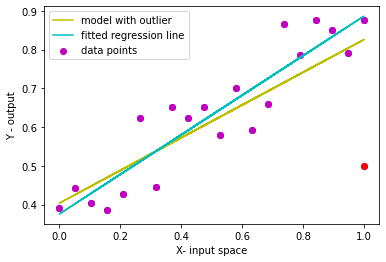

In [14]:
# Regression line plot with outlier
plt.plot(X_new,predicted_y_n, color = 'y')
plt.plot(X,predicted_y, color = 'c')
plt.scatter(X, y, color= 'm')

plt.scatter(X_new, y_new, color= 'm')
plt.scatter(1, 0.5, color="red")

plt.xlabel("X- input space")
plt.ylabel("Y - output")
plt.legend(["model with outlier", "fitted regression line", "data points"], loc ="upper left")


In [15]:
# Error of the model with outlier
mse_error_outlier = calc_error(X_new,y_new)
print("Error from the regression model with outlier is =",mse_error_outlier)

Error from the regression model with outlier is = 0.010067928192361499


In [16]:
# Comparision of two models

increase = ((mse_error_outlier - mse_error)*100)/mse_error
print("Percentage increase in error when an outlier is introduced is",increase)

Percentage increase in error when an outlier is introduced is 135.132979793535


## Reflection
Discuss your results and answer the following questions:
1. Which data point adds the biggest error term to the optimised error function?
2. How does the error contributed by this point relate to its distance from the regression line/function? 
3. How do outliers effect linear regression and why?
4. Under what circumstances will linear regression with a squared error measure be a good model?

1. The data point which adds the most error to error function is (0.7368421052631579, 0.8657746706245105) 
2. Since error function-MSE measures distance between actual and predicted values, the distance of the actual data point to regression line from the plot, provides error quantity for that point. Greater the distance higher is the error. 
3. Consider first model when we assume there are no outliers. Here, learning algorithm picks a regression line based on best Ein from hypothesis set. Ein depends on entire sample set. Now when an outlier is present, the previous regression model (even if present in the hypothesis set) will have higher Ein because of the outlier. But the learning algorithm picks a hypothesis(regression line) which provides the lowest Ein in that set which will return be a skewed line tilted slightly towards the outlier. 
4. MSE is a good error measure for linear regression when there are no outliers. Since the distance is squared in the function, the effect of outlier error in Ein is far worse. Similar to variance, MSE is prone to outliers. In this example, we can see that there is over 135% increase in error when 1 outlier is added.



# Task 3b

For regression the Mean Squared Error measure is a useful error measure. In this task we will explore how useful mean squared error is for classification. To this end:

- Use the provided code to classify the provided data using the linear classification algorithm
- Note that linear classification is implemented by putting the output of the linear regression model through the sign function

### Answer

In [ ]:
def calc_class_error(w,X,y):
    # implement your error function for linear classification here

In [ ]:
def linclass_predict(w,X):
    # implement your linear classification algorithm here

You may add as many cells below as you require.

# Reflection
Describe the impact of the outlier on both models. Explain why logistic regression is less sensitive to the outlier. 

Provide your answer in this cell..

## Demonstration of effect of outlier on logistic regression decision boundary for comparision with linear classification

Below code demonstrates the effect of an outlier on the decision boundary chosen by logistic regression. You can use this code to compare the effect of outliers in a classification algorithm using mean square error as the error measure with that in a classification algorithm using log likelihood as the error measure. Moreover, below code provides some good hints for plotting the decision boundary in task 3b :-).

Load data:

In [ ]:
data = np.loadtxt("Et1_Task3b.csv", delimiter=",")
X = data[:,0:2]
y=data[:,2]

Fit model:

In [ ]:
estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X,y)
estimator.score(X,y)

Extract weights from model:

In [ ]:
w_lr = estimator.intercept_
w_lr=np.append(w_lr, estimator.coef_)
w_lr

Add outlier:

In [ ]:
X = np.append(X,[[-2,6]], axis=0)
y = np.append(y,[1],axis=0)

Fit model with outlier:

In [ ]:
estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X,y)
estimator.score(X,y)

Extract new weight vector from model:

In [ ]:
w_lr_2 = estimator.intercept_
w_lr_2=np.append(w_lr_2, estimator.coef_)
w_lr_2

Plot original and new decision boundary using weight vectors. Decision boundary is defined by equation: $w_0+x_0\cdot w_1+x_1 \cdot w_2=0 \rightarrow x_2 = -\frac{w_0}{w_2}-x_1\frac{w_1}{w_2}$

In [ ]:
y_p = estimator.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot([-2,2],[-w_lr[0]/w_lr[2]+w_lr[1]/w_lr[2]*2,-w_lr[0]/w_lr[2]-w_lr[1]/w_lr[2]*2],'b',label="original data")
plt.plot([-2,2],[-w_lr_2[0]/w_lr_2[2]+w_lr_2[1]/w_lr_2[2]*2,-w_lr_2[0]/w_lr_2[2]-w_lr_2[1]/w_lr_2[2]*2],'r',label='data with outlier')

plt.title("Data with outlier classified with logistic regression")
plt.legend(loc="upper right")
plt.show()
1-sum(abs(y_p-y))/len(y)